In [82]:
import panel as pn
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mocserver import MOCServer
import mocpy
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from astropy.wcs import WCS
from sparcl.client import SparclClient  
from dl import queryClient as qc
from astropy.coordinates import SkyCoord
from astropy import units as u
import pandas as pd
import os
pn.extension()
from matplotlib.figure import Figure

import holoviews as hv
#hv.extension('matplotlib')
hv.extension("bokeh")
from matplotlib import cm

In [83]:

def tools(plot, element):
    plot.handles['plot'].toolbar.active_drag = None
    plot.handles['plot'].toolbar.active_scroll = None

In [87]:
def get_plot(x_var, Nbins = 30,  cumulative = False, log_y = False):
        """Create a basic scatter plot of the data with the selected axis.

        The data is represented as a Holoviews Datashader object allowing for
        large numbers of points to be rendered at once. Plotted using a Bokeh
        renderer, the user has full manuverabilty of the data in the plot.

        Returns
        -------
        plot : Holoviews Object
            A Holoviews plot

        """
        x_var = x_var[np.isfinite(x_var)]
        stats, edges  =  np.histogram(x_var, bins = Nbins)
        if cumulative:
            stats = np.cumsum(stats)
        if log_y: ylim = (1,None) 
        else: ylim = (0,None)
        plot = hv.Histogram((edges, stats)).opts(color = "blue", logy =log_y, line_color="blue", ylim = ylim)

       
        plot = plot.opts(
        xlabel='jjfjfjf',
        ylabel="# Sources",
        hooks=[tools])

        return plot
    

In [86]:
x = np.random.randn(87)

In [90]:
Nbins = 20
log_y = True
plot = get_plot(x, Nbins = Nbins, log_y = log_y)

In [91]:
plot

:Histogram   [x]   (Frequency)

In [52]:
hv.help(hv.Histogram)

Parameters of 'Histogram'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                Value             Type     Bounds   Mode 

group            'Histogram'         String             C RW 
label                 ''             String             C RW 
cdims                 {}              Dict              V RW 
kdims          [Dimension('x')]       List     (1, 1)   V RW 
vdims      [Dimension('Frequency')]   List   (1, None)  V RW 
extents    (None, None, None, None)  Tuple              V RW 
datatype           ['grid']           List   (0, None)  V RW 

Parameter docstrings:

group:    A string describing the data wrapped by the object.
label:    Optional label describing the data, typically reflecting where
          or how it was measured. The label should allow a specific
          measurement or dataset to be referenced for a given group.
cdims:    T

In [42]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

fig = Figure(figsize=(10, 10))
ax = fig.subplots()

strm = ax.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=cm.autumn)


In [48]:
def _update_stretching(self, event):
        stretch = event.new
        print(stretch)

N = 500

radius_input = pn.widgets.FloatInput(name = "Radius [arcsec]", value = 5,
                                     step = 0.5, start = 1, end = 100, 
                                     sizing_mode="fixed", width = int(N/2))

stretching_input = pn.widgets.Select(name = "Stretching function", 
                                        options =  ['Linear','Sqrt','Log', 'Asinh','PowerLaw'],
                                        sizing_mode="fixed", width = int(N/2))

contrast_scaler = pn.widgets.RangeSlider(name = "Image scaling", 
                                                  start = 0, end = 1,value = (0,1), 
                                                  step = 0.004,    sizing_mode="fixed", width = N)
stretching_input.param.watch(_update_stretching, "value");

mpl_pane = pn.pane.Matplotlib(fig, dpi=144, tight = True, width = 500)

In [49]:
pn.Column(mpl_pane,
        pn.WidgetBox(pn.Row(radius_input, stretching_input),
                                        contrast_scaler)
        )


BokehModel(combine_events=True, render_bundle={'docs_json': {'ce57508d-0eef-48bf-90e6-f80b379b6437': {'version…

In [9]:
pn.pane.DataFrame(df)

BokehModel(combine_events=True, render_bundle={'docs_json': {'48f4e1e0-e8bb-4154-85a0-5d8a0a981259': {'version…

In [11]:
False | True

True

In [ ]:
mpl_pane.

In [102]:
def check_isin_survey(ra, dec, path = "data/mocs"):
    surveys = {"Euclid Q1" : "Euclid_Q1_color.fits",
               "DESI"  :     "DESI_from_query.fits",
               "SDSS"  : "SDSS_color.fits",
               "VLASS" : "VLASS_QL.fits",
               "LoTSS" : "LoTSS_dr2.fits",
               }
    covered ={}
    for survey, fname in surveys.items():
        moc = mocpy.MOC.from_fits(os.path.join(path, fname))
        covered[survey] = moc.contains_lonlat(ra*u.deg, dec*u.deg)
    return covered




In [103]:
%%timeit
check_isin_survey(10,34, path = "../../data/mocs")

2.62 ms ± 156 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
path = "../../data/mocs"
surveys = {"Euclid Q1" : "Euclid_Q1_color.fits",
               "DESI"  :     "DESI_from_query.fits",
               "SDSS"  : "SDSS_color.fits",
               "VLASS" : "VLASS_QL.fits",
               "LoTSS" : "LoTSS_dr2.fits",
               }
    
for survey, fname in surveys.items():
    moc = mocpy.MOC.from_fits(os.path.join(path, fname))

In [ ]:
moc.contains_lonlat

In [33]:
datasets = ["DESI-DR1", "DESI-EDR"]
datasets_str = ', '.join(f"'{ds}'" for ds in datasets)

In [71]:

query = f"""SELECT sparcl_id, specid, ra, dec
            FROM sparcl.main
            WHERE data_release IN ({datasets_str})
            LIMIT 20000000"""

In [72]:
table= qc.query(sql=query, fmt='pandas')

In [100]:
moc.contains_lonlat?

Signature: moc.contains_lonlat(lon, lat, keep_inside=True)
Docstring:
Test wether a MOC contains (or not) the given points. Returns a boolean mask array.

The coordinates should be expressed in equatorial coordinates using the
ICRS reference. We follow the Space MOC standard.

Parameters
----------
lon : `astropy.coordinates.Longitude` or its supertype `astropy.units.Quantity`
    Right ascension array in deg
lat : `astropy.coordinates.Latitude` or its supertype `astropy.units.Quantity`
    Declination array in deg
keep_inside : bool, optional
    True by default. If so the mask describes coordinates lying inside the MOC.
    If ``keep_inside`` is false, contains will return the mask of the coordinates
    lying outside the MOC.

Raises
------
ValueError : If `lon` and `lat` have mismatched shapes.

Returns
-------
array : `~np.ndarray`
    A mask boolean array

Examples
--------
>>> from mocpy import MOC
>>> from astropy.coordinates import Angle
>>> # create lists of coordinates
>>> l

In [73]:
desi_coords = SkyCoord(table["ra"], table["dec"], unit = "deg")

In [87]:
mydesi = mocpy.MOC.from_skycoords(desi_coords, max_norder =4)


In [21]:
euclid = MOCServer.query_region(criteria="ID=CDS/P/Euclid/Q1/color",

                       fields=['ID', 'moc_access_url'],

                       casesensitive=True, return_moc = True)


In [82]:
width = 1620
height = 810

wcs = WCS({
    'NAXIS': 2,
    'NAXIS1': width,
    'NAXIS2': height,
    'CTYPE1': 'RA---AIT',
    'CTYPE2': 'DEC--AIT',
    'CRVAL1': 180.0,     # RA center
    'CRVAL2': 0.0,       # Dec center
    'CRPIX1': width / 2 + 0.5,
    'CRPIX2': height / 2 + 0.5,
    'CDELT1': -360.0 / width,  # degrees per pixel (entire 360° RA range over width)
    'CDELT2': 180.0 / height,  # entire -90° to 90° Dec range over height
})


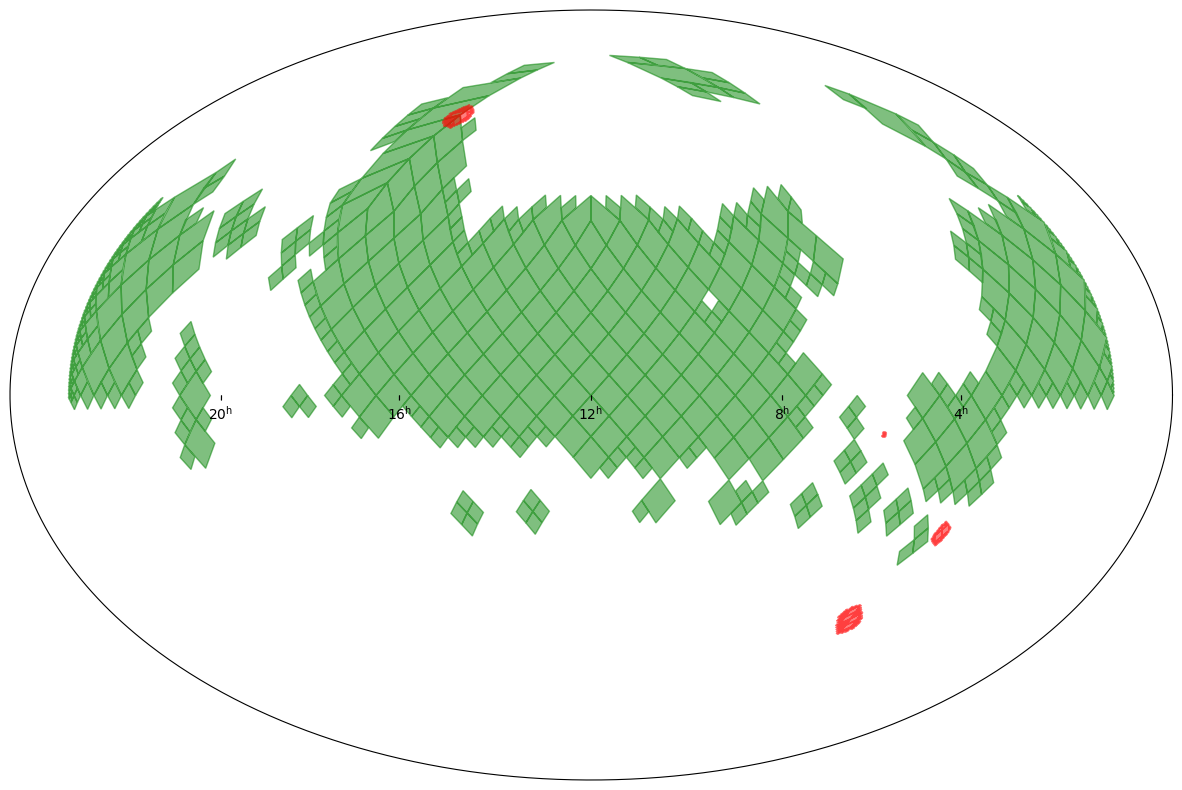

In [88]:
fig = plt.figure(111, figsize=(15, 10))

ax = fig.add_subplot(1, 1, 1, projection=wcs, frame_class=EllipticalFrame)
# Call fill with a matplotlib axe and the `~astropy.wcs.WCS` wcs object.
mydesi.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
euclid.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="red")

In [84]:
len(table)

20000000

In [68]:
desi = MOCServer.query_region(criteria="ID=CDS/P/DESI-Legacy-Surveys/DR10/g",

                       fields=['ID', 'moc_access_url'],

                       casesensitive=True, return_moc=True)

In [69]:
desi

1/17 25-26 34 
2/16-18 32-34 67 73-74 76-78 82 88 98 108-110 122 126 131 133-135 140-142 171 
 174-175 177 179-181 
3/8 10-11 32 76 80 140 144 160 192-193 196-197 208 256-257 260-261 263-266 
 289-291 301-303 316 320 322 341 358 360 364 384-385 389-391 396-397 399 444 
 482-483 492-493 495 513-515 518-519 521-523 529-531 573-575 578 584 586 599 
 605 607 629 631 639 683 690-691 693-695 705 707 713 715 728-730 733 743 749 
 752 755 757-758 761 763-765 767 
4/0 2 8 10-11 36 38 132-134 136-138 308-310 312-314 324-326 328-330 385 387-390 
 564-566 568-570 580-582 584-586 644-646 648-650 781 792-793 796-797 836-838 
 840 1032 1034-1035 1037-1038 1048-1050 1069-1071 1154-1155 1200 1202-1203 
 1268-1270 1272-1274 1292 1294 1336 1338 1372-1373 1375 1397 1399 1424 
 1426-1427 1444-1445 1447-1450 1464-1465 1544 1546-1547 1549-1554 1593-1595 
 1780-1782 1784-1786 1877 1922-1923 1926-1927 1944 1946-1947 1976 1978-1979 
 2034-2035 2040-2042 2049-2051 2064 2066 2083 2113-2115 2288-2289 2291 
 2305-2

In [61]:
desi

ID
str36
CDS/P/DESI-Legacy-Surveys/DR10/color
CDS/P/DESI-Legacy-Surveys/DR10/g
CDS/P/DESI-Legacy-Surveys/DR10/i
CDS/P/DESI-Legacy-Surveys/DR10/r
CDS/P/DESI-Legacy-Surveys/DR10/z


In [23]:
sdss = MOCServer.query_region(criteria="ID=CDS/P/SDSS9/color",

                       fields=['ID', 'moc_access_url'],

                       casesensitive=True, return_moc=True)

In [24]:
sdss.write("../../data/mocs/SDSS_color.fits")

/var/folders/s3/bn73s6bj2n748y1g7cghflyh0000gp/T/ipykernel_6440/4133801374.py:1: DeprecationWarning: This method is deprecated. Use MOC.save(path, "fits") instead!
  sdss.write("../../data/mocs/SDSS_color.fits")


In [22]:
euclid.write("../../data/mocs/Euclid_Q1_color.fits")

/var/folders/s3/bn73s6bj2n748y1g7cghflyh0000gp/T/ipykernel_6440/3849610869.py:1: DeprecationWarning: This method is deprecated. Use MOC.save(path, "fits") instead!
  euclid.write("../../data/mocs/Euclid_Q1_color.fits")


In [89]:
mydesi.save("../../data/mocs/DESI_from_query.fits", "fits")

In [6]:
table.to_csv("../../data/utility_data/AbsLines_air_vac.csv", sep = ",", index = False)

In [12]:
a.emline_table

,Ion,wave_air,wave_vac,primary,Name
8,Lyβ,1025.058,1025.722,1,Lyβ
11,ArI,1066.018,1066.660,1,ArI
12,Lyα,1215.076,1215.670,1,Lyα
13,NV,1238.231,1238.821,1,NaN
14,NV,1242.215,1242.804,1,NV
17,OI,1301.586,1302.168,1,OI
19,CII,1335.129,1335.708,1,CII
20,SiIV,1393.178,1393.755,1,
23,SiIV,1402.193,1402.770,1,SiIV
25,CIV,1547.604,1548.187,1,


In [13]:
import numpy as np
str(np.nan)

'nan'

In [6]:
datasets = ["DESI-DR1", "DESI-EDR"]

In [7]:
datasets_str = ', '.join(f"'{ds}'" for ds in datasets)

In [8]:
datasets_str

"'DESI-DR1', 'DESI-EDR'"